In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install seaborn --upgrade

     |████████████████████████████████| 292 kB 3.1 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [2]:
data_raw=pd.read_csv("Datos de un año - QV San Isidro.csv", sep=";")

In [3]:
data_raw.head(3)

,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura
0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3
1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3
2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231785 entries, 0 to 231784
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Fecha        231785 non-null  object 
 1   Hora         231785 non-null  object 
 2   Direccion    231782 non-null  float64
 3   Velocidad    170398 non-null  float64
 4   Racha        170398 non-null  float64
 5   Presion      170400 non-null  float64
 6   Temperatura  170401 non-null  float64
dtypes: float64(5), object(2)
memory usage: 12.4+ MB


In [5]:
#los nulos corresponden a mediciones de marea que estan intercalados
data=data_raw.dropna(axis=0)
data.reset_index(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170398 entries, 0 to 170397
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        170398 non-null  int64  
 1   Fecha        170398 non-null  object 
 2   Hora         170398 non-null  object 
 3   Direccion    170398 non-null  float64
 4   Velocidad    170398 non-null  float64
 5   Racha        170398 non-null  float64
 6   Presion      170398 non-null  float64
 7   Temperatura  170398 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 10.4+ MB


In [7]:
data.head(3)

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3


### CAMPOS DE FECHA

In [8]:
data["Time"]=data["Fecha"]+" "+data["Hora"]

<ipython-input-8-48fb9f336c21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Time"]=data["Fecha"]+" "+data["Hora"]


In [9]:
data["Time"]=pd.to_datetime(data.Time, format="%d/%m/%y %H:%M:%S" )
#format="%d/%m/%Y"
#infer_datetime_format=True
#

<ipython-input-9-1c39952f1109>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Time"]=pd.to_datetime(data.Time, format="%d/%m/%y %H:%M:%S" )


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170398 entries, 0 to 170397
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        170398 non-null  int64         
 1   Fecha        170398 non-null  object        
 2   Hora         170398 non-null  object        
 3   Direccion    170398 non-null  float64       
 4   Velocidad    170398 non-null  float64       
 5   Racha        170398 non-null  float64       
 6   Presion      170398 non-null  float64       
 7   Temperatura  170398 non-null  float64       
 8   Time         170398 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 11.7+ MB


In [11]:
data.head()

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3,2020-09-23 13:38:58
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3,2020-09-23 13:56:47
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3,2020-09-23 13:59:28
3,3,23/9/20,14:01:57,282.0,9.10,16.0,1020.22,21.1,2020-09-23 14:01:57
4,4,23/9/20,14:04:33,164.0,5.60,10.0,1020.25,21.1,2020-09-23 14:04:33


In [12]:
#defaso una copia de Time para calcular el delta entre filas
data["Time_shift_1"]=data["Time"].shift()

<ipython-input-12-b80eb6b38f52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Time_shift_1"]=data["Time"].shift()


In [13]:
data.head(3)

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3,2020-09-23 13:38:58,NaT
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3,2020-09-23 13:56:47,2020-09-23 13:38:58
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3,2020-09-23 13:59:28,2020-09-23 13:56:47


In [14]:
#calculo el delta
data["Time_delta_1"]=(data["Time"]-data["Time_shift_1"])
data

<ipython-input-14-5e9a8c7867d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Time_delta_1"]=(data["Time"]-data["Time_shift_1"])


,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1,Time_delta_1
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3,2020-09-23 13:38:58,NaT,NaT
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3,2020-09-23 13:56:47,2020-09-23 13:38:58,0 days 00:17:49
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3,2020-09-23 13:59:28,2020-09-23 13:56:47,0 days 00:02:41
3,3,23/9/20,14:01:57,282.0,9.10,16.0,1020.22,21.1,2020-09-23 14:01:57,2020-09-23 13:59:28,0 days 00:02:29
4,4,23/9/20,14:04:33,164.0,5.60,10.0,1020.25,21.1,2020-09-23 14:04:33,2020-09-23 14:01:57,0 days 00:02:36
...,...,...,...,...,...,...,...,...,...,...,...
170393,231769,16/9/21,13:21:24,100.0,6.97,9.0,1025.55,16.3,2021-09-16 13:21:24,2021-09-16 13:18:40,0 days 00:02:44
170394,231770,16/9/21,13:24:07,95.0,6.53,7.0,1025.52,16.4,2021-09-16 13:24:07,2021-09-16 13:21:24,0 days 00:02:43
170395,231772,16/9/21,13:26:49,81.0,8.10,10.0,1025.40,16.4,2021-09-16 13:26:49,2021-09-16 13:24:07,0 days 00:02:42
170396,231774,16/9/21,13:29:33,78.0,10.37,12.0,1025.30,16.2,2021-09-16 13:29:33,2021-09-16 13:26:49,0 days 00:02:44


In [15]:
data.head(3)

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1,Time_delta_1
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3,2020-09-23 13:38:58,NaT,NaT
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3,2020-09-23 13:56:47,2020-09-23 13:38:58,0 days 00:17:49
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3,2020-09-23 13:59:28,2020-09-23 13:56:47,0 days 00:02:41


In [16]:
data.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Time_delta_1
count,170398.000000,170398.000000,170398.000000,170398.000000,170398.000000,170398.000000,170397
mean,113196.814317,158.623039,9.921488,11.895404,1013.910620,17.086808,0 days 00:03:01.521951677
std,68457.729541,95.212042,5.503845,6.445309,50.356043,5.688869,0 days 00:28:00.684502303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:19
25%,52360.500000,84.000000,5.700000,7.000000,1012.120000,12.700000,0 days 00:02:40
50%,113196.000000,135.000000,9.070000,11.000000,1015.690000,17.700000,0 days 00:02:42
75%,172766.750000,234.000000,13.200000,16.000000,1019.610000,21.400000,0 days 00:02:44
max,231776.000000,360.000000,38.670000,105.000000,10013.500000,32.300000,7 days 01:30:20


### ANALIZO LA DIFERENCIA DE TIEMPO DE LAS MEDICIONES

In [17]:
#establezco los cortes
delay_5min=pd.Timedelta("00:05:00")
delay_1hour=pd.Timedelta("00:60:00")
delay_1day=pd.Timedelta("24:00:00")

In [18]:
#selecciono los que tienen mas de 5 minutos y menos de 1 hora
delay_over_5=data[(data["Time_delta_1"]> delay_5min) & (data["Time_delta_1"]< delay_1hour)]
delay_over_5.Time_delta_1.describe()

count                         6909
mean     0 days 00:06:05.377623389
std      0 days 00:03:37.124224227
min                0 days 00:05:01
25%                0 days 00:05:20
50%                0 days 00:05:24
75%                0 days 00:05:29
max                0 days 00:58:32
Name: Time_delta_1, dtype: object

In [19]:
#selecciono los que tienen mas de 1 homra y menos de 1 dia
delay_over_1h=data[(data["Time_delta_1"]> delay_1hour)& (data["Time_delta_1"]< delay_1day)]
delay_over_1h.Time_delta_1.describe()

count                           39
mean     0 days 02:23:20.743589743
std      0 days 02:55:15.778267161
min                0 days 01:00:01
25%                0 days 01:07:12
50%                0 days 01:26:05
75%                0 days 02:12:41
max                0 days 14:30:29
Name: Time_delta_1, dtype: object

In [20]:
#selecciono los que tienen mas de 1 dia
delay_over_1day=data[data["Time_delta_1"]> delay_1day]
delay_over_1day.Time_delta_1.describe()

count                            3
mean     4 days 02:09:11.666666666
std      2 days 13:57:56.693879780
min                2 days 09:51:08
25%         2 days 14:28:37.500000
50%                2 days 19:06:07
75%         4 days 22:18:13.500000
max                7 days 01:30:20
Name: Time_delta_1, dtype: object

In [21]:
delay_over_1day

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1,Time_delta_1
47282,59440,31/12/20,12:14:59,229.0,0.0,0.0,0.00,0.0,2020-12-31 12:14:59,2020-12-28 17:08:52,2 days 19:06:07
52863,68616,18/1/21,13:30:40,62.0,10.9,13.0,0.00,0.0,2021-01-18 13:30:40,2021-01-11 12:00:20,7 days 01:30:20
168038,228502,11/9/21,15:44:24,61.0,11.6,13.0,1013.93,16.1,2021-09-11 15:44:24,2021-09-09 05:53:16,2 days 09:51:08


In [22]:
data.iloc[47281:47284]

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1,Time_delta_1
47281,58848,28/12/20,17:08:52,122.0,17.63,20.0,1009.4,26.6,2020-12-28 17:08:52,2020-12-28 17:06:07,0 days 00:02:45
47282,59440,31/12/20,12:14:59,229.0,0.00,0.0,0.0,0.0,2020-12-31 12:14:59,2020-12-28 17:08:52,2 days 19:06:07
47283,59441,31/12/20,12:17:59,228.0,0.00,0.0,0.0,0.0,2020-12-31 12:17:59,2020-12-31 12:14:59,0 days 00:03:00


### AGRUPO LAS MEDICIONES CADA 15 MINUTOS

In [23]:
data_15min=data.groupby(pd.Grouper(key="Time", freq="15min")).mean()
data_15min

,index,Direccion,Velocidad,Racha,Presion,Temperatura
Time,,,,,,
2020-09-23 13:30:00,0.000000,268.000000,0.070000,2.000000,1020.510000,21.300000
2020-09-23 13:45:00,1.500000,279.500000,2.450000,14.000000,1020.235000,21.300000
2020-09-23 14:00:00,4.000000,203.333333,6.723333,12.000000,1020.230000,21.066667
2020-09-23 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-09-16 12:30:00,231749.000000,78.600000,7.900000,9.000000,1026.046000,16.240000
2021-09-16 12:45:00,231756.166667,82.333333,7.633333,9.000000,1025.908333,16.483333
2021-09-16 13:00:00,231763.000000,84.200000,7.154000,8.200000,1025.764000,16.640000


In [24]:
#agreo un indice, para que Time pase a ser una columna
data_15min.reset_index(drop=False, inplace=True)
data_15min

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura
0,2020-09-23 13:30:00,0.000000,268.000000,0.070000,2.000000,1020.510000,21.300000
1,2020-09-23 13:45:00,1.500000,279.500000,2.450000,14.000000,1020.235000,21.300000
2,2020-09-23 14:00:00,4.000000,203.333333,6.723333,12.000000,1020.230000,21.066667
3,2020-09-23 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
34364,2021-09-16 12:30:00,231749.000000,78.600000,7.900000,9.000000,1026.046000,16.240000
34365,2021-09-16 12:45:00,231756.166667,82.333333,7.633333,9.000000,1025.908333,16.483333
34366,2021-09-16 13:00:00,231763.000000,84.200000,7.154000,8.200000,1025.764000,16.640000
34367,2021-09-16 13:15:00,231770.000000,88.500000,7.711667,9.166667,1025.508333,16.383333


In [25]:
#calculo la cantidad de horas nulas que hay para cada fecha (cada hora tiene 4 periodos de 15 minutos)
data_15min["Date"]=data_15min.Time.dt.date
data_null=pd.DataFrame(data_15min[data_15min["Direccion"].isna()].Date.value_counts())
data_null["HS_null"]=data_null["Date"]/4
data_null

,Date,HS_null
2021-01-16,96,24.00
2020-12-30,96,24.00
2021-01-13,96,24.00
2020-12-29,96,24.00
2021-09-10,96,24.00
2021-01-12,96,24.00
2021-01-15,96,24.00
2021-01-14,96,24.00
2021-01-17,96,24.00
2021-09-09,72,18.00


In [26]:
#analizo el ranking de la cantidad de horas nulas
data_null.HS_null.value_counts()

24.00    9
0.75     8
0.50     7
0.25     7
1.00     4
2.75     3
3.50     3
1.50     2
15.50    2
13.50    2
13.00    1
18.00    1
15.00    1
14.25    1
6.75     1
12.00    1
2.00     1
5.50     1
4.00     1
2.25     1
4.25     1
Name: HS_null, dtype: int64

In [27]:
data_15min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34369 entries, 0 to 34368
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         34369 non-null  datetime64[ns]
 1   index        32737 non-null  float64       
 2   Direccion    32737 non-null  float64       
 3   Velocidad    32737 non-null  float64       
 4   Racha        32737 non-null  float64       
 5   Presion      32737 non-null  float64       
 6   Temperatura  32737 non-null  float64       
 7   Date         34369 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.1+ MB


###ANALIZAMOS LA FRECUENCIA DE LAS MEDICIONES

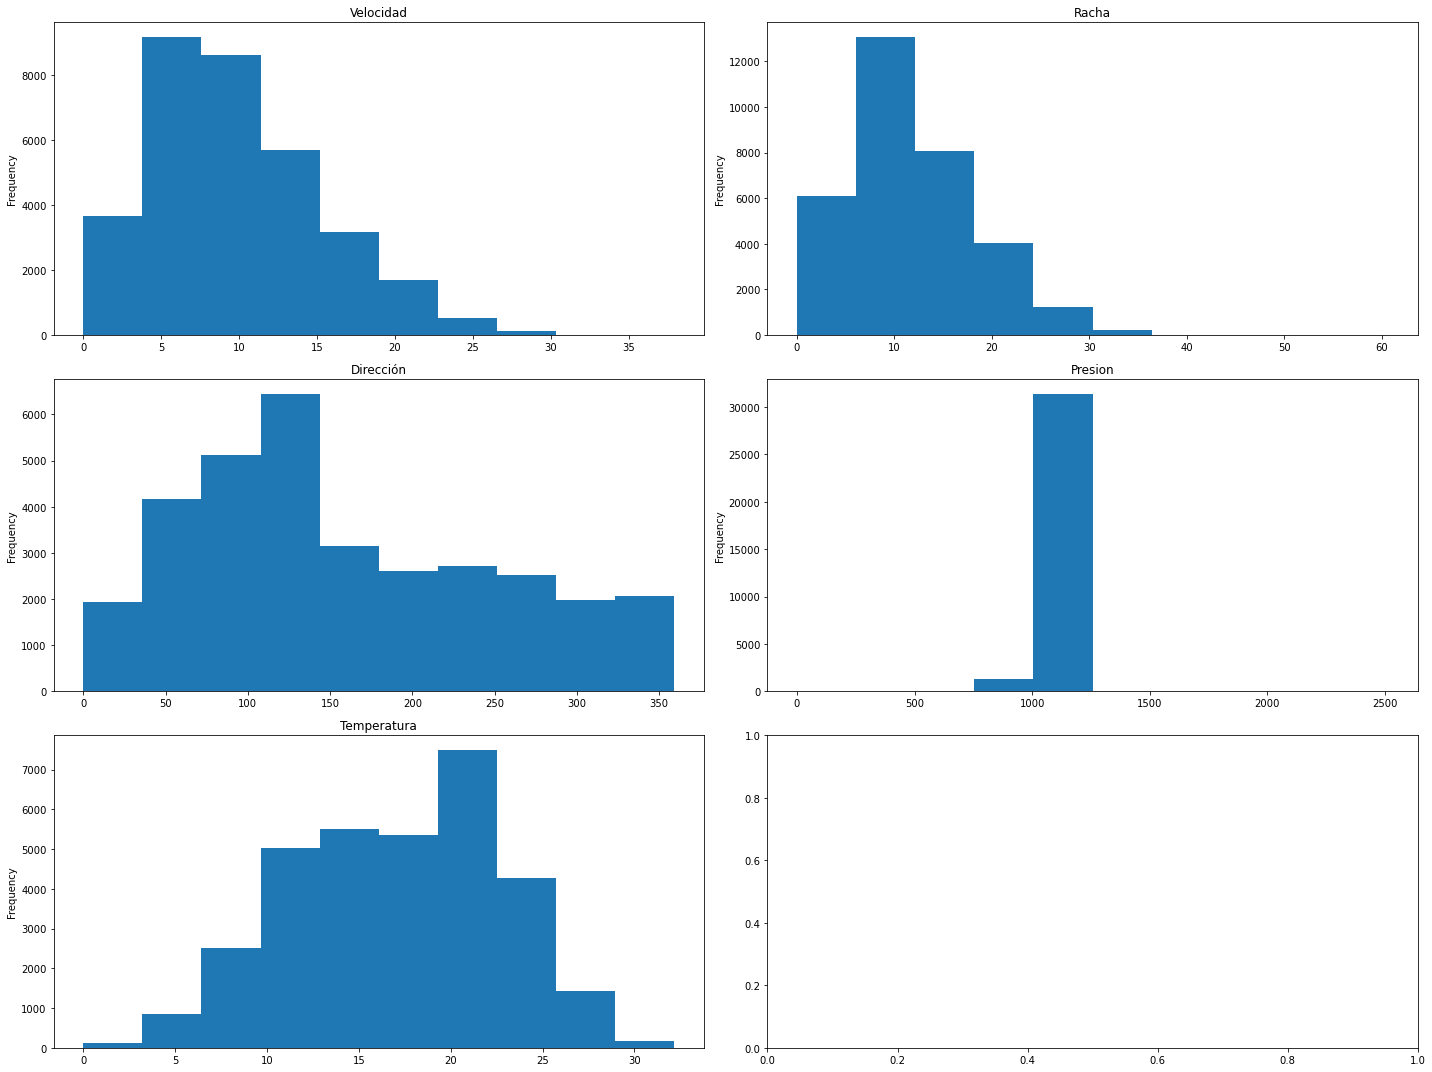

In [28]:
fig,ax=plt.subplots(3,2, figsize=(20,15),sharey=False, sharex=False)
data_15min.Velocidad.plot(kind="hist", ax=ax[0,0], title="Velocidad")
data_15min.Racha.plot(kind="hist", ax=ax[0,1], title="Racha")
data_15min.Direccion.plot(kind="hist", ax=ax[1,0], title="Dirección")
data_15min.Presion.plot(kind="hist", ax=ax[1,1], title="Presion")
data_15min.Temperatura.plot(kind="hist", ax=ax[2,0], title="Temperatura")
fig.tight_layout()


<div class="alert-danger">
### ***OJO HAY VALORES ERRONEOS EN PRESION, HAY QUE ANALIZAR ESA FEATURE
</div>


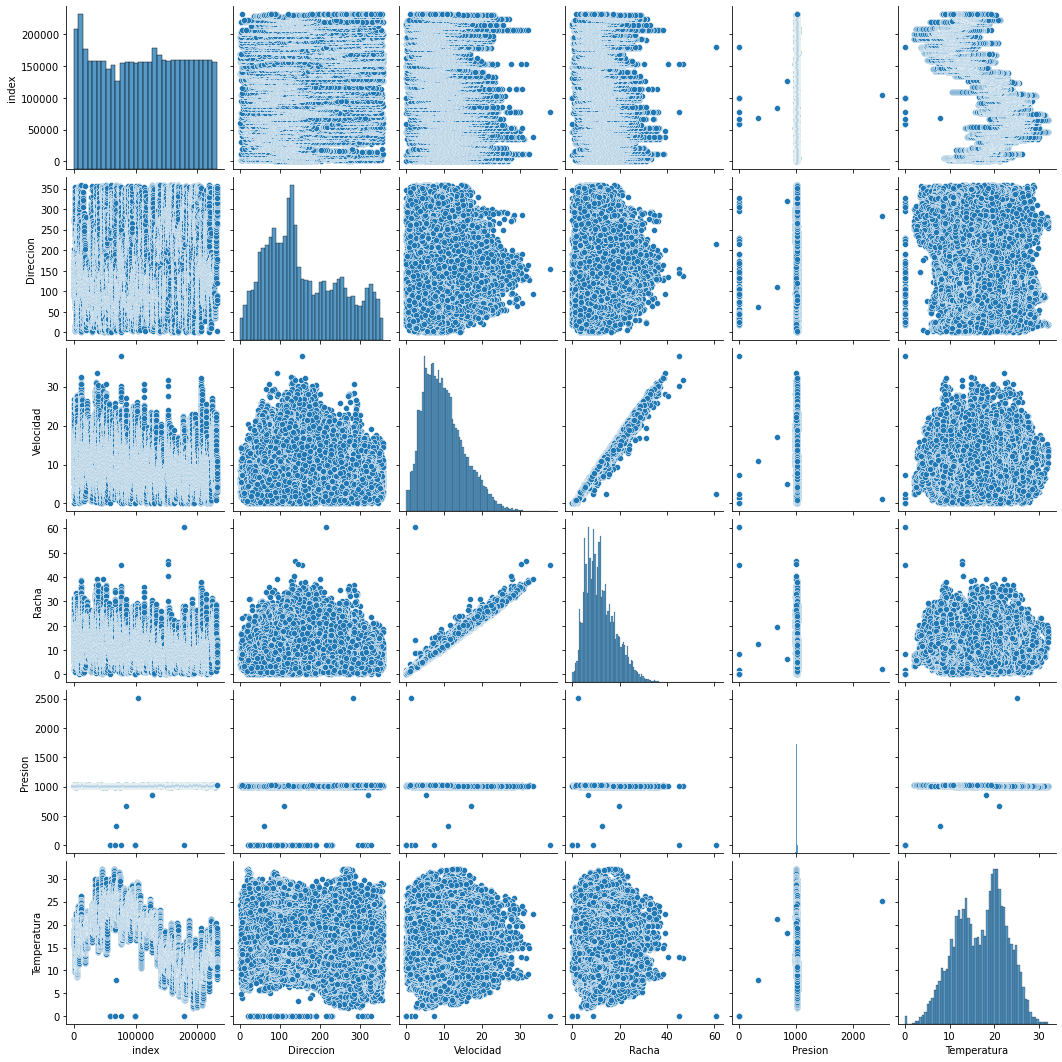

In [29]:
sns.pairplot(data_15min)

  <div class="alert-warning"> 
NO VEO CORRELACION ENTRE LOS DATOS, SALVO VELOCIDAD Y RACHA
</div>  


### AGREGAMOS DATOS DE LAS ESTACIONES PARA VER SI PODEMOS ENCONTRA MAYOR CORRELACION

In [30]:
#separo la informacion de los meses
data_15min["Mes"]=data_15min.Time.dt.month

In [31]:
#identifico las estaciones de acuerdo a los meses
data_15min["Estacion"]=data_15min["Mes"]
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Primavera" if x==9 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Primavera" if x==10 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Primavera" if x==11 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Verano" if x==12 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Verano" if x==1 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Verano" if x==2 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Otono" if x==3 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Otono" if x==4 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Otono" if x==5 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Invierno" if x==6 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Invierno" if x==7 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Invierno" if x==8 else x)


#data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Verano" if x>=12 & x<3 else x)

In [32]:
data_15min["Estacion"].value_counts()

Otono        8832
Invierno     8832
Verano       8640
Primavera    8065
Name: Estacion, dtype: int64

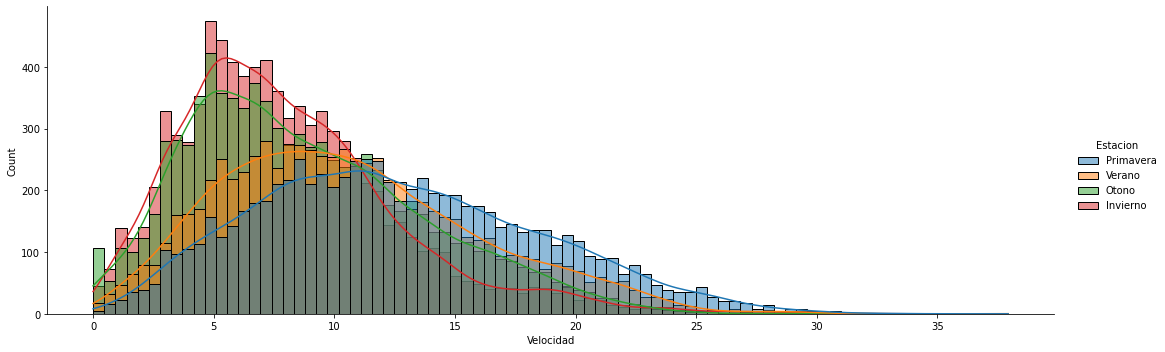

In [33]:

sns.displot(x=data_15min.Velocidad, kde=True, hue=data_15min["Estacion"], aspect=30/10)


In [34]:
data_15min.Velocidad.mean()

9.88791737432665

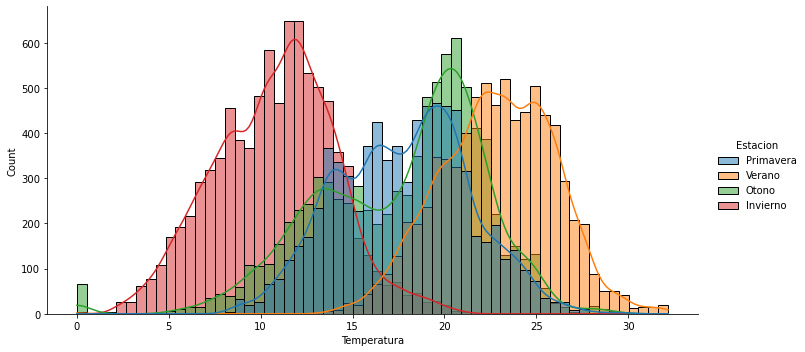

In [35]:
sns.displot(x=data_15min.Temperatura, kde=True, hue=data_15min["Estacion"], aspect=20/10)


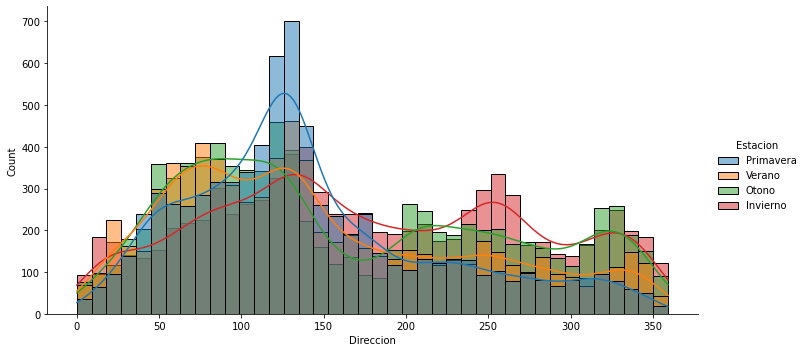

In [36]:
sns.displot(x=data_15min.Direccion, kde=True, hue=data_15min["Estacion"], aspect=20/10)


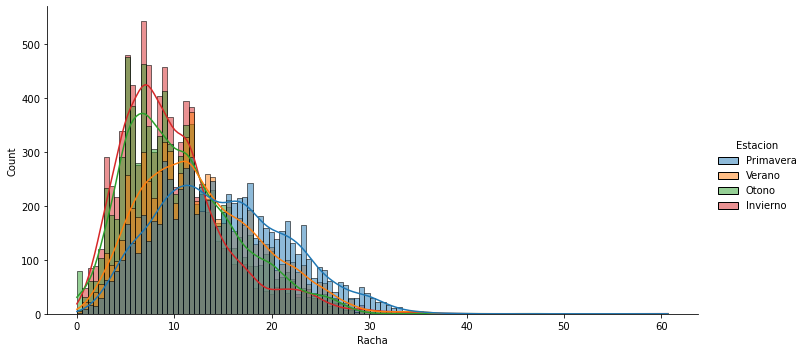

In [37]:
sns.displot(x=data_15min.Racha, kde=True, hue=data_15min["Estacion"], aspect=20/10)


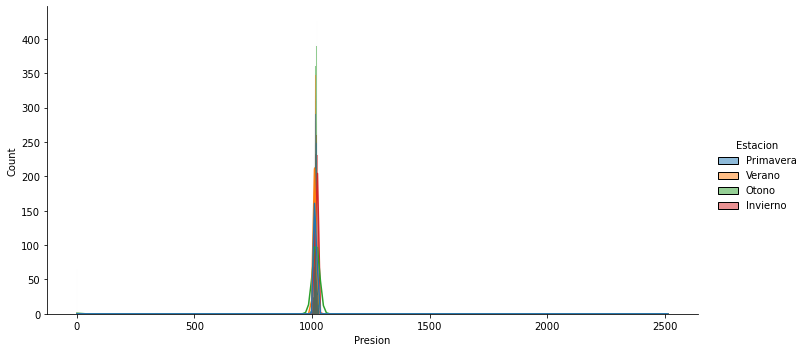

In [38]:
sns.displot(x=data_15min.Presion, kde=True, hue=data_15min["Estacion"], aspect=20/10)


In [39]:
data_15min.groupby(by="Estacion")["Velocidad"].mean()

Estacion
Invierno      8.053129
Otono         8.762835
Primavera    12.587615
Verano       10.593014
Name: Velocidad, dtype: float64

In [40]:
data_15min["Hora"]=data_15min["Time"].dt.hour
data_15min["Hora"]

0        13
1        13
2        14
3        14
4        14
         ..
34364    12
34365    12
34366    13
34367    13
34368    13
Name: Hora, Length: 34369, dtype: int64

In [41]:
data_15min["Horario_navegable"]=np.nan
data_15min["Horario_navegable"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
34364   NaN
34365   NaN
34366   NaN
34367   NaN
34368   NaN
Name: Horario_navegable, Length: 34369, dtype: float64

In [42]:
for i in data_15min.index:
    if (data_15min.Hora.iloc[i]>=9) & (data_15min.Hora.iloc[i]<=16):
        data_15min.Horario_navegable.iloc[i]=1
    else:
        data_15min.Horario_navegable.iloc[i]=0

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [43]:
data_15min.Horario_navegable.value_counts()

0.0    22912
1.0    11457
Name: Horario_navegable, dtype: int64

In [44]:
data_horario_1=data_15min[data_15min.Horario_navegable==1]
data_horario_1

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura,Date,Mes,Estacion,Hora,Horario_navegable
0,2020-09-23 13:30:00,0.000000,268.000000,0.070000,2.000000,1020.510000,21.300000,2020-09-23,9,Primavera,13,1.0
1,2020-09-23 13:45:00,1.500000,279.500000,2.450000,14.000000,1020.235000,21.300000,2020-09-23,9,Primavera,13,1.0
2,2020-09-23 14:00:00,4.000000,203.333333,6.723333,12.000000,1020.230000,21.066667,2020-09-23,9,Primavera,14,1.0
3,2020-09-23 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,9,Primavera,14,1.0
4,2020-09-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,9,Primavera,14,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34364,2021-09-16 12:30:00,231749.000000,78.600000,7.900000,9.000000,1026.046000,16.240000,2021-09-16,9,Primavera,12,1.0
34365,2021-09-16 12:45:00,231756.166667,82.333333,7.633333,9.000000,1025.908333,16.483333,2021-09-16,9,Primavera,12,1.0
34366,2021-09-16 13:00:00,231763.000000,84.200000,7.154000,8.200000,1025.764000,16.640000,2021-09-16,9,Primavera,13,1.0
34367,2021-09-16 13:15:00,231770.000000,88.500000,7.711667,9.166667,1025.508333,16.383333,2021-09-16,9,Primavera,13,1.0


In [45]:
data_horario_1.groupby(by="Estacion")["Velocidad"].mean()

Estacion
Invierno      8.887756
Otono         8.303235
Primavera    11.458768
Verano        9.508527
Name: Velocidad, dtype: float64

In [46]:
data_horario_1.groupby(by="Estacion")["Velocidad"].std()

Estacion
Invierno     4.758407
Otono        4.433390
Primavera    5.124258
Verano       4.756762
Name: Velocidad, dtype: float64

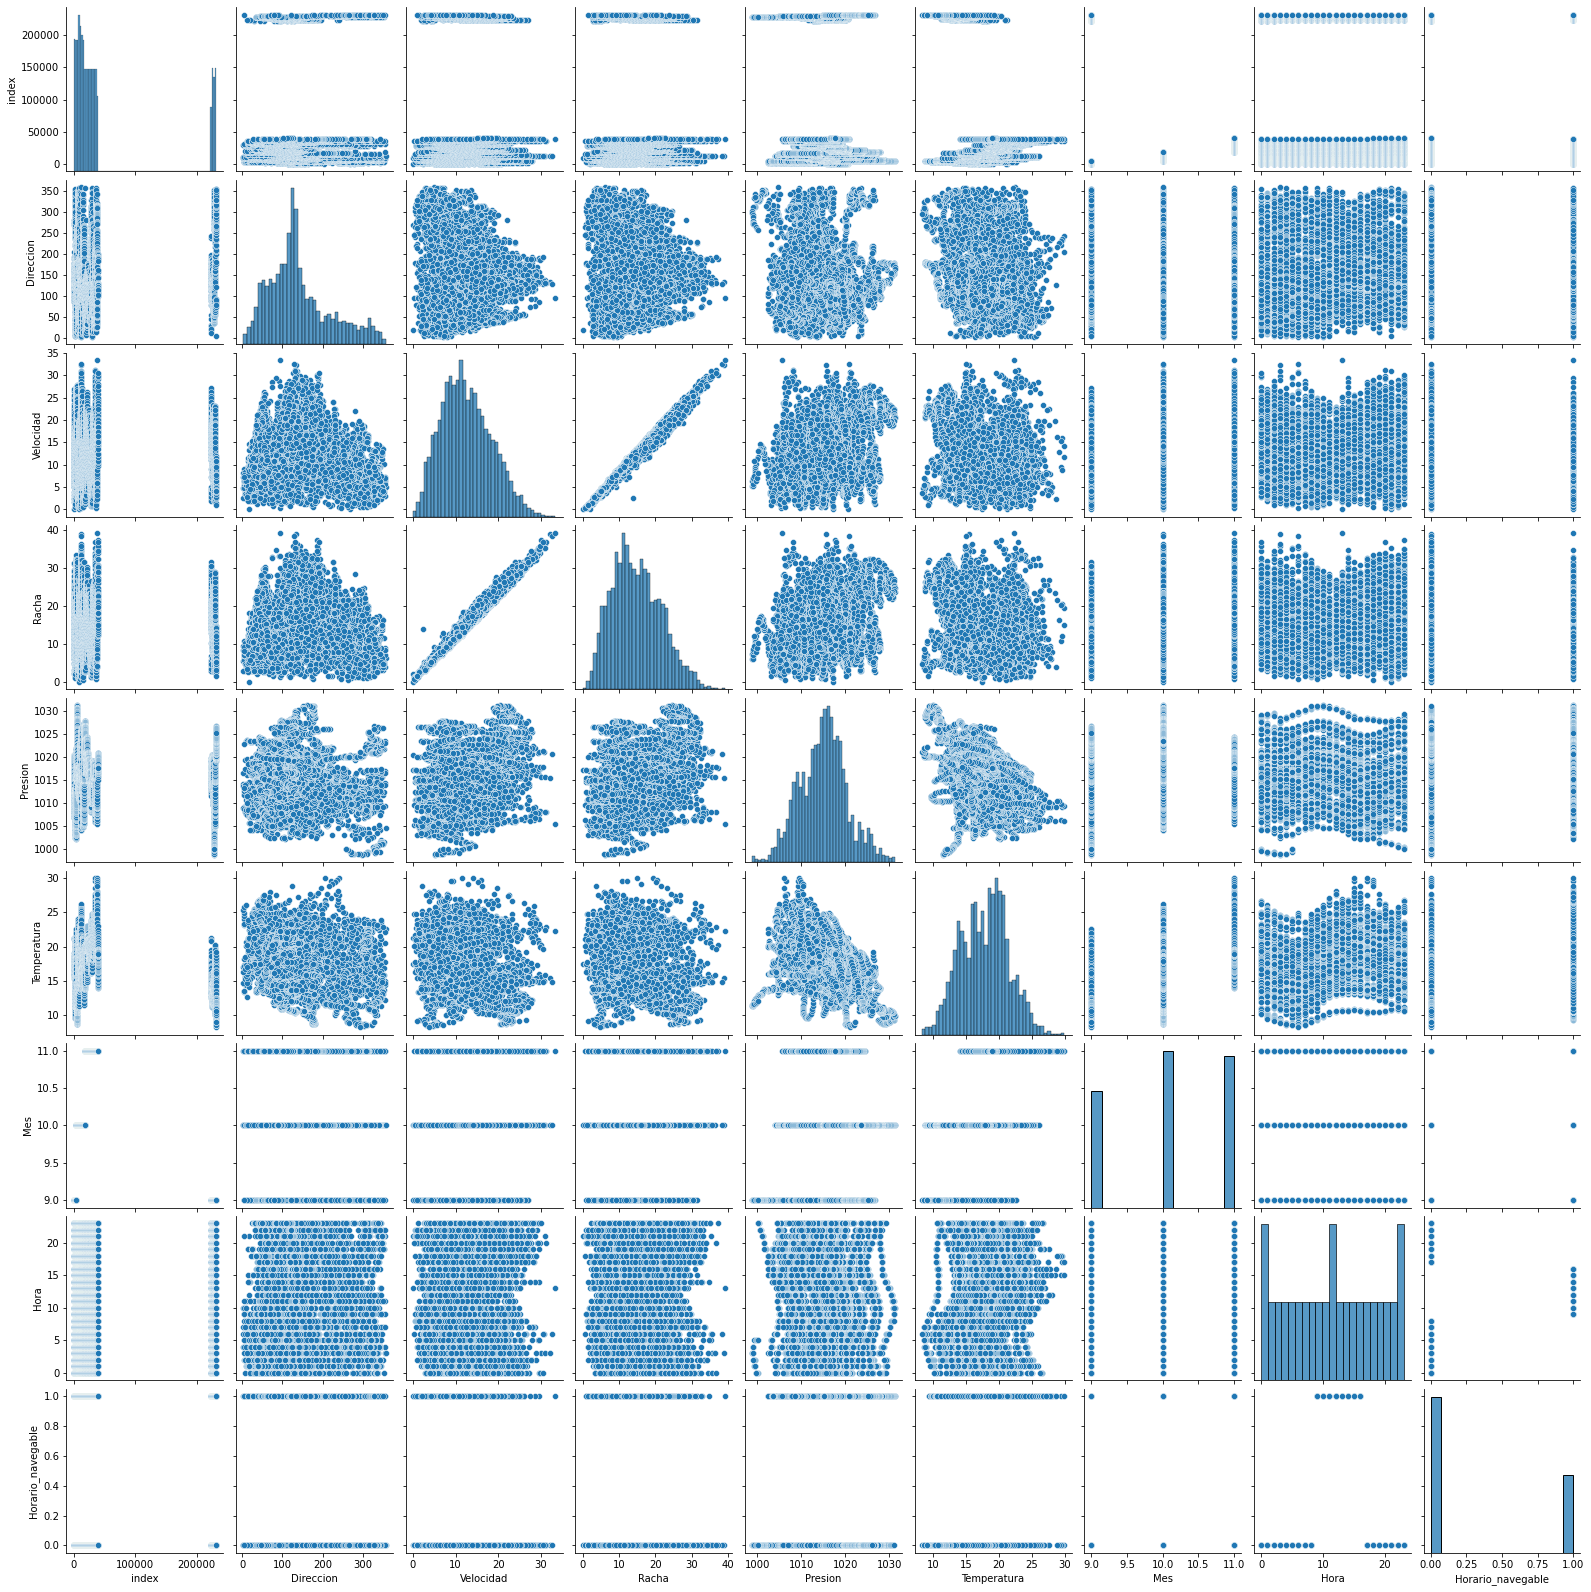

In [47]:
sns.pairplot(data_15min[data_15min.Estacion=="Primavera"])

### CONTROL REGISTROS FALTANTES PRESION ATMOSFERICA

#### CTL REGISTROS MINIMOS

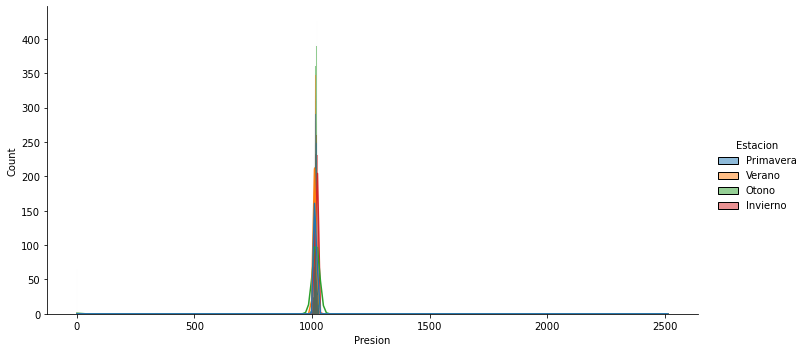

In [48]:
#grafico donde se ven los registros anormales de Presion Atmosferica
sns.displot(x=data_15min.Presion, kde=True, hue=data_15min["Estacion"], aspect=20/10)


In [49]:
#describe del campo Presion
data_15min.Presion.describe()

count    32737.000000
mean      1013.737419
std         48.212054
min          0.000000
25%       1012.188000
50%       1015.740000
75%       1019.656000
max       2513.540000
Name: Presion, dtype: float64

  <div class="alert-warning"> 
La media es correcta, 1013 hp es el valor normal
    
Hay que verificar el desvio std, ver si los valores de la media +/- el std son registros posibles 

</div>  


In [50]:
#mascara para filtrar los registros menor a 900 hp
error_presion_min=900
error_presion_min_mask=data_15min.Presion<900
error_presion_min_data=data_15min[error_presion_min_mask]
error_presion_min_data.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Hora,Horario_navegable
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,98279.006393,105.924886,1.125616,2.118721,25.589110,0.646347,3.205479,10.095890,0.260274
std,13389.597970,86.727883,5.062793,9.155400,131.825778,3.349086,1.589540,7.442678,0.441821
min,59440.000000,19.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,99130.000000,33.666667,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
50%,99257.500000,77.333333,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000,0.000000
75%,99384.600000,147.000000,0.000000,0.000000,0.000000,0.000000,3.000000,15.000000,1.000000
max,178986.000000,328.000000,37.933333,60.666667,850.606667,21.183333,12.000000,23.000000,1.000000


 <div class="alert-warning"> 
Ver que en los casos de Presion = 0 tambien dan 0 los registros de Velocidad, Racha, Presion, Temperatura
</div>  


In [51]:
#verifico en que fecha se dan los valores con error
error_presion_min_data.Date.value_counts()

2021-03-04    47
2021-03-03    18
2020-12-31     2
2021-02-10     1
2021-01-30     1
2021-04-12     1
2021-06-29     1
2021-01-11     1
2021-01-18     1
Name: Date, dtype: int64

#### CTL REGISTROS MAXIMOS

In [52]:
#mascara para filtrar los registros MAYOO a 1100 hp
error_presion_max=1050
error_presion_max_mask=data_15min.Presion>error_presion_max
error_presion_max_data=data_15min[error_presion_max_mask]
error_presion_max_data.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Hora,Horario_navegable
count,1.0,1.0,1.000000,1.00,1.00,1.000000,1.0,1.0,1.0
mean,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0,0.0
25%,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0,0.0
50%,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0,0.0
75%,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0,0.0
max,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0,0.0


In [53]:
#verifico en que fecha se dan los valores con error
error_presion_max_data.Date.value_counts()

2021-03-11    1
Name: Date, dtype: int64

## Viento

In [54]:
import iris
import iris.coord_categorisation
import iris.quickplot as qplt

In [76]:
import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import math
from math import pi

In [57]:
data_15min.head()

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura,Date,Mes,Estacion,Hora,Horario_navegable
0,2020-09-23 13:30:00,0.0,268.000000,0.070000,2.0,1020.510,21.300000,2020-09-23,9,Primavera,13,1.0
1,2020-09-23 13:45:00,1.5,279.500000,2.450000,14.0,1020.235,21.300000,2020-09-23,9,Primavera,13,1.0
2,2020-09-23 14:00:00,4.0,203.333333,6.723333,12.0,1020.230,21.066667,2020-09-23,9,Primavera,14,1.0
3,2020-09-23 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,9,Primavera,14,1.0
4,2020-09-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,9,Primavera,14,1.0


In [67]:
def func(deg):
    if   deg >=  11.25 and deg <  33.75: return 'NNE'
    elif deg >=  33.75 and deg <  56.25: return 'NE'
    elif deg >=  56.25 and deg <  78.75: return 'ENE'
    elif deg >=  78.75 and deg < 101.25: return 'E'
    elif deg >= 101.25 and deg < 123.75: return 'ESE'
    elif deg >= 123.75 and deg < 146.25: return 'SE'
    elif deg >= 146.25 and deg < 168.75: return 'SSE'
    elif deg >= 168.75 and deg < 191.25: return 'S'
    elif deg >= 191.25 and deg < 213.75: return 'SSW'
    elif deg >= 213.75 and deg < 236.25: return 'SW'
    elif deg >= 236.25 and deg < 258.75: return 'WSW'
    elif deg >= 258.75 and deg < 281.25: return 'W'
    elif deg >= 281.25 and deg < 303.75: return 'WNW'
    elif deg >= 303.75 and deg < 326.25: return 'NW'
    elif deg >= 326.25 and deg < 348.75: return 'NNW'
    elif math.isnan(deg): return math.nan
    else: return 'N'

data_15min['Direction'] = data_15min['Direccion'].apply(func)

In [68]:
data_15min.head()

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura,Date,Mes,Estacion,Hora,Horario_navegable,Direction
0,2020-09-23 13:30:00,0.0,268.000000,0.070000,2.0,1020.510,21.300000,2020-09-23,9,Primavera,13,1.0,W
1,2020-09-23 13:45:00,1.5,279.500000,2.450000,14.0,1020.235,21.300000,2020-09-23,9,Primavera,13,1.0,W
2,2020-09-23 14:00:00,4.0,203.333333,6.723333,12.0,1020.230,21.066667,2020-09-23,9,Primavera,14,1.0,SSW
3,2020-09-23 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,9,Primavera,14,1.0,NaN
4,2020-09-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,9,Primavera,14,1.0,NaN


<AxesSubplot:xlabel='velocidad_x', ylabel='velocidad_y'>

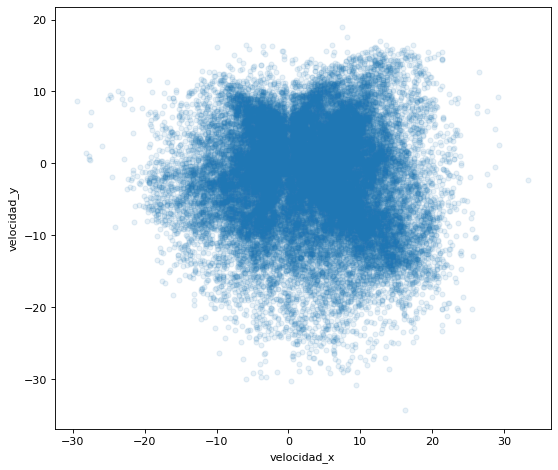

In [81]:
data_15min['velocidad_x'] = data_15min['Velocidad'] * np.sin(data_15min['Direccion'] * pi / 180.0)
data_15min['velocidad_y'] = data_15min['Velocidad'] * np.cos(data_15min['Direccion'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
data_15min.plot(kind='scatter', x='velocidad_x', y='velocidad_y', alpha=0.10, ax=ax)

### Windrose in bar and proportional box modes

In [72]:
%%capture
!pip install windrose openpyxl
from windrose import WindroseAxes

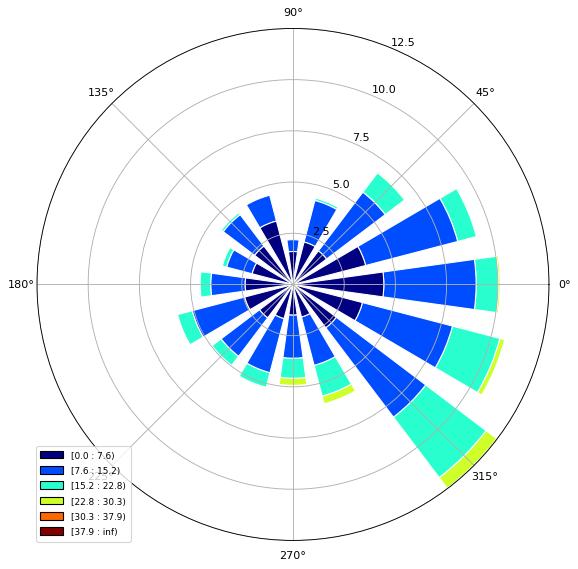

In [84]:
ax = WindroseAxes.from_ax()
ax.bar(data_15min.Direccion, data_15min.Velocidad, normed=True, opening=0.7, edgecolor='white')
ax.set_legend()

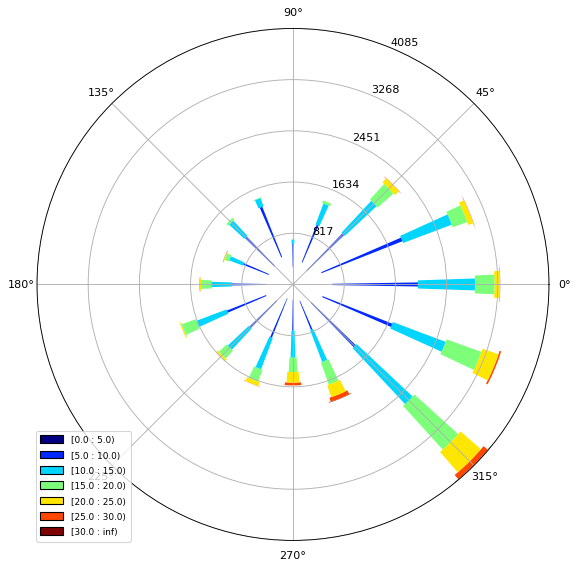

In [87]:
ax = WindroseAxes.from_ax()
ax.box(data_15min.Direccion, data_15min.Velocidad, bins=np.arange(0, 35, 5))
ax.set_legend()